In [1]:
#Load python libraries

import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import re
from pylab import *

In [2]:
#Load data

df = pd.read_csv('compound_data.csv')
y = np.array(df['Structure'])
alloy_names = list(df['Alloys'])[:44]
df.drop(['Alloys', 'Structure', 'Tm'],axis=1,inplace=True)
X = df.values

element_properties_data = pd.read_csv("element_properties.csv")
delta_H_data = pd.read_csv("element_H.csv")
element_properties_data_df = pd.DataFrame(element_properties_data)
delta_H_data_df = pd.DataFrame(delta_H_data)
element_properties_data_df.set_index(["element"], inplace=True)
delta_H_data_df.set_index(["element"], inplace=True)

In [3]:
#Compute VEC

VEC_list = []

for alloy_string in alloy_names:

    ee = re.findall('[A-Z][a-z]?', alloy_string)
    aa = re.findall('[A-Z][a-z]?|[0.0-99.9]+', alloy_string)
    cc = []
    for i in range(len(aa)):
        if aa[i] in ee:
            if i+1 < len(aa):
                if aa[i+1] in ee:
                    cc.append(1)
                elif aa[i+1] not in ee:
                    cc.append(float(aa[i+1]))
            elif i+1 == len(aa):
                cc.append(1)            
    ele_list = ee
    con_array = np.array(cc)
    con_array = con_array/con_array.sum()
    VEC_array = np.array([element_properties_data_df.loc[ele_list[i],'VEC'] for i in range(len(ele_list))])
    avg_VEC = np.array([con_array[i]*VEC_array[i] for i in range(len(ele_list))]).sum()
    VEC_list.append(avg_VEC)

In [4]:
#Categorize data based on phases

am_idx = np.where(y == 'am')[0]
cp_idx = np.where(y == 'cp')[0]
fcc_idx = np.where(y == 'FCC')[0]
bcc_idx = np.where(y == 'BCC')[0]

Text(0, 0.5, '$\\Omega$')

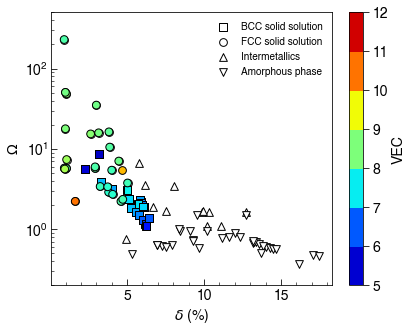

In [5]:
#Plot phase diagram

symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 2.5*1.5*1.67323,2.0*1.5*1.67323
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=7*2.0)

ss = 60

plt.scatter([list(df['delta'])[i] for i in bcc_idx],[list(df['omega'])[i] for i in bcc_idx],c='white',edgecolor='black',label='BCC solid solution',marker='s',s=ss)
plt.scatter([list(df['delta'])[i] for i in fcc_idx],[list(df['omega'])[i] for i in fcc_idx],c='white',edgecolor='black',label='FCC solid solution',marker='o',s=ss)

plt.scatter([list(df['delta'])[i] for i in bcc_idx],[list(df['omega'])[i] for i in bcc_idx],facecolors='None',edgecolor='black',marker='s',cmap = 'jet',c=VEC_list[:19],vmin=5.0,vmax=12.0,s=ss)
plt.scatter([list(df['delta'])[i] for i in fcc_idx],[list(df['omega'])[i] for i in fcc_idx],facecolors='None',edgecolor='black',marker='o',cmap = 'jet',c=VEC_list[19:],vmin=5.0,vmax=12.0,s=ss)

plt.scatter([4.66],[5.4],facecolors='None',edgecolor='black',marker='o',cmap = 'jet',c=[10],vmin=5.0,vmax=12.0,s=ss)

cmap = plt.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=5.0,vmax=12.0)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(5,12,8),
             boundaries=np.arange(5,13,1),
             label='VEC')

plt.scatter([list(df['delta'])[i] for i in cp_idx],[list(df['omega'])[i] for i in cp_idx],c='white',edgecolor='black',label='Intermetallics',marker='^',s=ss)
plt.scatter([list(df['delta'])[i] for i in am_idx],[list(df['omega'])[i] for i in am_idx],c='white',edgecolor='black',label='Amorphous phase',marker='v',s=ss)

plt.yscale("log")

plt.xticks([5,10,15])
plt.yticks([1,10,100])

plt.minorticks_on()

plt.tick_params(axis="y",direction="in",which='both')
plt.tick_params(axis="x",direction="in",which='both')

plt.ylim([0.2,500])

plt.legend(frameon=False,prop={'size': 10})
plt.xlabel(r'$\delta$ (%)')
plt.ylabel(r'$\Omega$')
#plt.savefig('HR_plot_final_2024.pdf', format='pdf',transparent = True,dpi=600)